## Llibreries utilitzades

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from metrics_module import metrics
import numpy as np
from dataloader_module import load_data, extreure_columnes
from imblearn.over_sampling import SMOTE
from graphs_module import plot_roc_auc

## Càrrega i pre-processament de les dades


In [2]:
# Carreguem les dades
datafile = "../data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## Creació i test de Random Forest

Millor threshold: 0.021, Millor score: 1.495638473657918
Accuracy: 0.6843
Precision: 0.1254
Recall: 0.8113
F1 Score: 0.2172


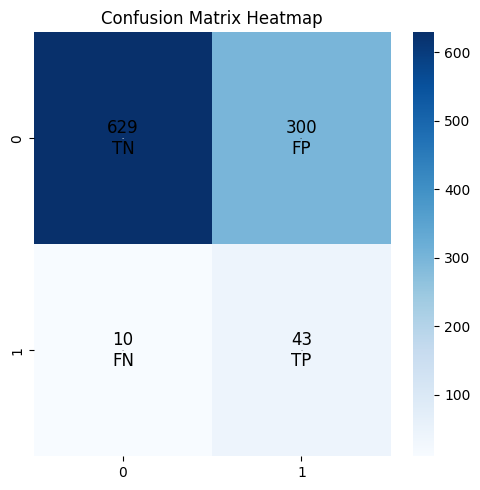

In [3]:
# Entrenar el model Random Forest amb les dades equilibrades
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

y_proba = clf.predict_proba(X_test)[:, 1]

# Trobar el millor threshold que maximitza l'accuracy i el recall
best_threshold = 0.0
best_score = 0.0

for threshold in np.arange(0.0, 1.0, 0.001):
    y_pred_temp = (y_proba >= threshold).astype(int)
    accuracy_temp, precision_temp, recall_temp, f1_temp, _ = metrics(y_test, y_pred_temp)
    score = accuracy_temp + recall_temp  # Combinar accuracy i recall en un sol score

    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Millor threshold: {best_threshold}, Millor score: {best_score}")

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= best_threshold).astype(int)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)


## ROC Curve i AUC

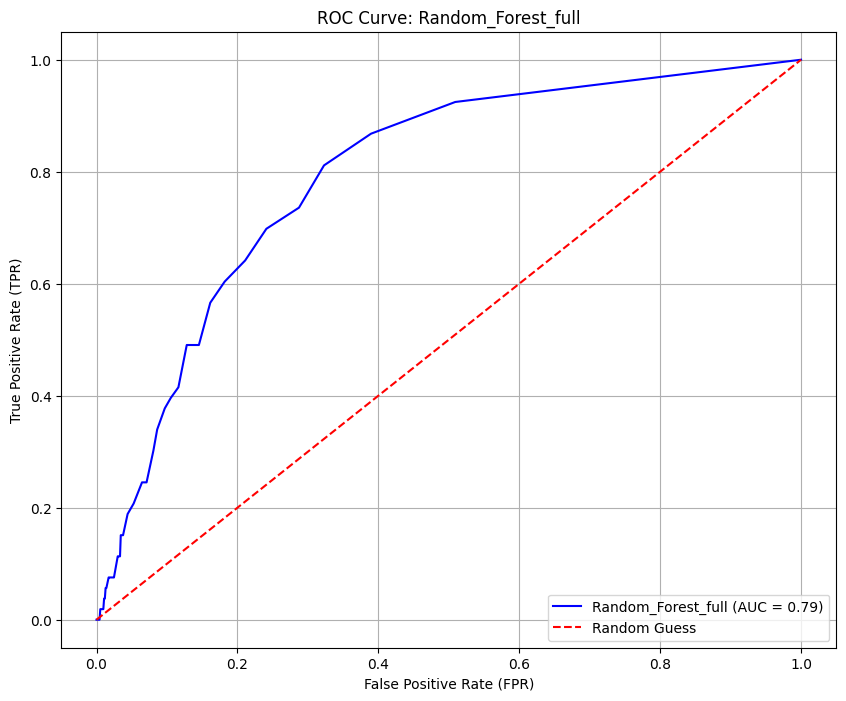

Random_Forest_full AUC Score: 0.79


In [4]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Random_Forest_full")

## Eliminem les característiques

Millor threshold: 0.007, Millor score: 1.1512123890404642
Accuracy: 0.4908
Precision: 0.0677
Recall: 0.6604
F1 Score: 0.1228


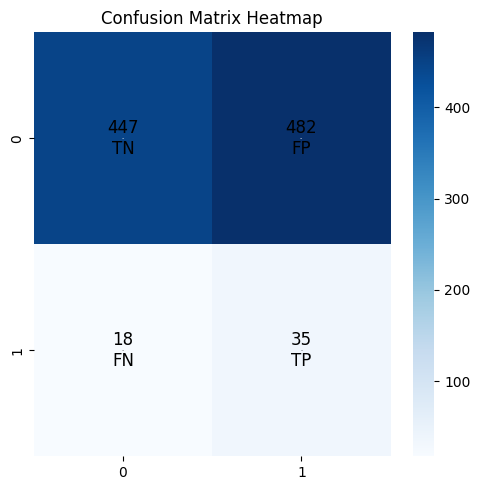

In [5]:
X,Y = load_data(datafile)
X,y = extreure_columnes(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

y_proba = clf.predict_proba(X_test)[:, 1]

# Trobar el millor threshold que maximitza l'accuracy i el recall
best_threshold = 0.0
best_score = 0.0

for threshold in np.arange(0.0, 1.0, 0.001):
    y_pred_temp = (y_proba >= threshold).astype(int)
    accuracy_temp, precision_temp, recall_temp, f1_temp, _ = metrics(y_test, y_pred_temp)
    score = accuracy_temp + recall_temp  # Combinar accuracy i recall en un sol score

    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Millor threshold: {best_threshold}, Millor score: {best_score}")

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= best_threshold).astype(int)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

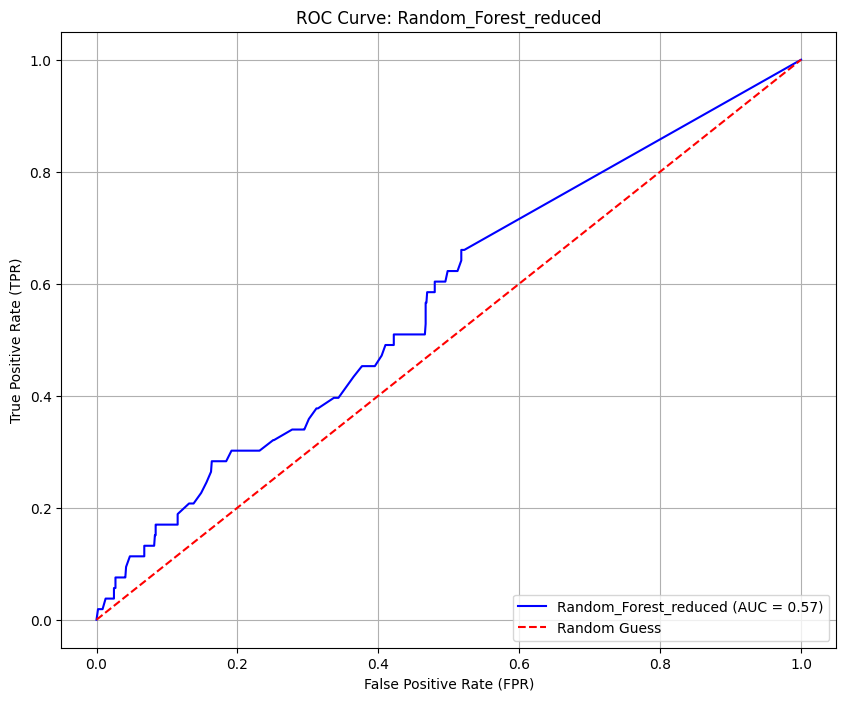

Random_Forest_reduced AUC Score: 0.57


In [6]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Random_Forest_reduced")